# **0. 준비단계**

## 0.1. 모듈 설치

In [42]:
# ! pip install konlpy
# ! pip install tensorflow

In [43]:
!apt -qq -y install fonts-nanum # 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directo

## 0.2. 패키지 IMPORT

In [44]:
import os
import re
import json
import pickle

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from wordcloud import WordCloud
# from konlpy.tag import Okt

plt.rc('font', family='NanumGothic')       # matplotllib 한글 문장
mpl.rcParams['axes.unicode_minus'] = False      # minus 처리


from tensorflow.keras import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate, LSTM, BatchNormalization, Bidirectional, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

## 0.3. 구글 드라이브 MOUNT

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
file_path = '/content/drive/MyDrive/Colab Notebooks/3조_XXXX/04. 기타자료/data/'
data_path = '/content/drive/MyDrive/Colab Notebooks/3조_XXXX/04. 기타자료/data/lstm_test/'

# **1. 모델 데이터 불러오기**

## **Settings**

In [47]:
# input
model_num = 7       # MODEL 1 ~ 7
model_type = 2      # MODEL TYPE 1: simple | 2: Dropout | 3: Batch Normalization | 4: Bi-LSTM
p = 1               # number of categories(2, 3, 4)

save_num = f'{model_num}-{model_type}'

if p == 1:
    activation = 'linear'
    loss_function = 'mean_squared_error'
    metric = 'mse'
else:
    activation = 'softmax'
    loss_function = 'categorical_crossentropy'
    metric = 'accuracy'

# **2. LSTM 모델 생성**

## 2.2. 모델 불러오기

In [48]:
model_LSTM = load_model(data_path + f'/Prev_Best_LSTM_Model{save_num}.hdf5')

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          6400000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 6,498,945
Trainable params: 6,498,945
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 학습데이터 불러오기
with open(data_path + f'traintest_data{save_num}.pkl', 'rb') as f:
    traintest_data = pickle.load(f)

In [50]:
# history 불러오기
with open(data_path + f'history{save_num}.pkl', 'rb') as f:
    history = pickle.load(f)

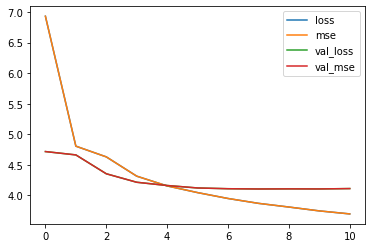

In [51]:
df_history = pd.DataFrame(history)
df_history.plot()

In [52]:
loss, accuracy = model_LSTM.evaluate(traintest_data['x_test'], traintest_data['y_test'], verbose=1)
print(f'손실량: {loss:.2f}, 정확도: {accuracy:.2f}')

705/705 [==============================] - 4s 5ms/step - loss: 4.1917 - mse: 4.1917
손실량: 4.19, 정확도: 4.19


# **3. Unsmile 데이터 예측** 

## 3.1. Unsmile 데이터 불러오기

In [53]:
with open(file_path + 'kiwi_unsmile_pos.pkl', 'rb') as f:
    unsmile_pos = pickle.load(f)

In [54]:
unsmile_df = pd.read_csv(file_path + 'unsmile.txt', sep='\t', usecols=['sentence'])
unsmile_df.columns = ['문장']
unsmile_df['형태소'] = unsmile_pos
unsmile_df['sentence'] = unsmile_df['형태소'].apply(lambda x: ' '.join([pos[0] for pos in x]))
unsmile_df

,문장,형태소,sentence
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,"[(일, NNG), (안, MAG), (하, VV), (는, ETM), (시간, N...",일 안 하 는 시간 쉬 고 싶 어서 그런 것 아니
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,"[(아동, NNG), (성범죄, NNP), (페도, NNP), (벌, VV), (는...",아동 성범죄 페도 벌 는 기록 바 끊어지 어 영원히 고통 받 는 다 . 무슬림 50...
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,"[(루나, NNP), (솔로, NNP), (앨범, NNG), (나오, VV), (었...",루나 솔로 앨범 나오 었 을 때 머모 기운 있 었 음 ㅇㅇ Keep o doin 진...
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,"[(홍팍, NNG), (어버이, NNG), (연합, NNG), (이, VCP), (...",홍팍 어버이 연합 이 ᆫ가 보내 뭐 이런뎃글 있 는 데 이거 어버이 연합 측 신고 ...
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,"[(아놔, NNP), (왜, MAG), (여기, NP), (댓, NR), (들, X...",아놔 왜 여기 댓 들 다 여자 들 김치녀 이 라고 먼저 불리 었 여자 들 더 심하 ...
...,...,...,...
14999,께롱께롱께롱!!!,"[(께롱께롱께롱, NNG)]",께롱께롱께롱
15000,갱상도가아니라 홍어지 개좃같은 홍어년들,"[(갱, NNG), (상, XSN), (아니, VCN), (라, EC), (홍어, ...",갱 상 아니 라 홍어 지 개 좃 같 은 홍어 년 들
15001,말레이시아랑 인도네시아 여자 존나 못생겼던데,"[(말레이시아, NNP), (인도네시아, NNP), (여자, NNP), (존나, M...",말레이시아 인도네시아 여자 존나 못생기 었 던데
15002,링크도 안박고 가서 글 쓰자고 선동하네,"[(링크, NNG), (안, MAG), (박, VV), (고, EC), (가, VV...",링크 안 박 고 가 어서 글 쓰 자고 선동 하


## 3.2. 하이퍼 파라미터 정의

In [55]:
configuration = json.load(open(data_path + f'data_configs{model_num}.json','r'))

MAX_SEQ_LEN = configuration['MAX_SEQ_LEN']

VOCAB_SIZE = configuration['vocab_size']

EMB_SIZE = 128

EPOCHS = 1000

hidden_units = 128

## 3.3. 토크나이징

In [56]:
# 문장 리스트화
sentences = unsmile_df['sentence'].tolist()

# 토크나이저 실행(configuration에서 word_dic 불러오기)
tok = Tokenizer(oov_token="<OOV>")
tok.word_index = configuration['vocab']

# 벡터화
sent_vec = tok.texts_to_sequences(sentences)

# X 패딩
padded_Xpred = pad_sequences(sent_vec, maxlen = MAX_SEQ_LEN)

In [57]:
padded_Xpred

array([[   0,    0,    0, ...,   62,    8,  141],
       [   0,    0,    0, ..., 1678, 8789,   49],
       [   0,    0,    0, ..., 2805,  843,    1],
       ...,
       [   0,    0,    0, ...,    1,    1,    1],
       [   0,    0,    0, ...,    1, 1059,    4],
       [   0,    0,    0, ...,  364, 6859,  687]], dtype=int32)

In [58]:
Ypred = model_LSTM.predict(padded_Xpred)

469/469 [==============================] - 3s 4ms/step


In [59]:
unsmile_df['점수'] = Ypred
unsmile_df[['문장','점수']]

,문장,점수
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,7.425893
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,8.312759
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,9.050237
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,7.748850
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,7.363975
...,...,...
14999,께롱께롱께롱!!!,6.525832
15000,갱상도가아니라 홍어지 개좃같은 홍어년들,10.455935
15001,말레이시아랑 인도네시아 여자 존나 못생겼던데,7.781963
15002,링크도 안박고 가서 글 쓰자고 선동하네,7.572657


In [60]:
unsmile_df.to_csv(file_path + 'new_unsmile.csv', index=False)

# **4. 재학습하기**

## 4.1. Unsmile 학습 데이터, 검증 데이터, 테스트 데이터 분리

In [61]:
x_train, x_test, y_train, y_test = train_test_split(padded_Xpred, Ypred, test_size=0.2, shuffle=True, random_state=111)

In [62]:
# 어떻게 분배되었는가?
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([ 5.274748 ,  5.2923446,  5.385809 , ..., 10.592773 , 10.726955 ,
       10.902591 ], dtype=float32), array([1, 1, 1, ..., 1, 1, 1]))
(array([ 5.3561506,  5.550819 ,  5.559591 , ..., 10.373511 , 10.4532795,
       10.459891 ], dtype=float32), array([1, 1, 1, ..., 1, 1, 1]))


In [63]:
# one-hot encoding
if p != 1:
    y_train = to_categorical(y_train, p)
    y_test = to_categorical(y_test, p)

In [64]:
print(f'X: {padded_Xpred.shape}, Y: {Ypred.shape}')
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}')

X: (15004, 62), Y: (15004, 1)
x_train: (12003, 62), y_train: (12003, 1), x_test: (3001, 62), y_test: (3001, 1)


In [65]:
traintest_data = {'x_train':x_train,
                  'y_train':y_train,
                  'x_test':x_test,
                  'y_test':y_test}
with open(data_path + f'traintest_data_v2{save_num}.pkl', 'wb') as f:
    pickle.dump(traintest_data, f)

## 4.2. 하이퍼 파라미터 정의

In [66]:
configuration = json.load(open(data_path + f'data_configs{model_num}.json','r'))

MAX_SEQ_LEN = configuration['MAX_SEQ_LEN']

VOCAB_SIZE = configuration['vocab_size']

EMB_SIZE = 256

EPOCHS = 1000

hidden_units = 256

## 4.3 모델 정의

In [67]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          6400000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 6,498,945
Trainable params: 6,498,945
Non-trainable params: 0
_________________________________________________________________


# **5. 모델 학습**

## 5.1. Early Stopping, Model Checkpoint

### 5.1.1. Early Stopping

In [68]:
es = EarlyStopping(monitor='val_loss', patience=3)

### 5.1.2. Model Checkpoint

In [69]:
svm = ModelCheckpoint(filepath=data_path + f'/Prev_Best_LSTM_Model_v2{save_num}.hdf5', verbose=1, save_best_only=True)

## 5.2. 모델 학습

In [70]:
history = model_LSTM.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=EPOCHS, verbose=1, callbacks=[es, svm])

Epoch 1/1000
297/301 [============================>.] - ETA: 0s - loss: 0.0934 - mse: 0.0934
Epoch 1: val_loss improved from inf to 0.02155, saving model to /content/drive/MyDrive/Colab Notebooks/3조_XXXX/04. 기타자료/data/lstm_test/Prev_Best_LSTM_Model_v27-2.hdf5
301/301 [==============================] - 7s 18ms/step - loss: 0.0934 - mse: 0.0934 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 2/1000
297/301 [============================>.] - ETA: 0s - loss: 0.0808 - mse: 0.0808
Epoch 2: val_loss improved from 0.02155 to 0.01008, saving model to /content/drive/MyDrive/Colab Notebooks/3조_XXXX/04. 기타자료/data/lstm_test/Prev_Best_LSTM_Model_v27-2.hdf5
301/301 [==============================] - 5s 16ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 3/1000
296/301 [============================>.] - ETA: 0s - loss: 0.0748 - mse: 0.0748
Epoch 3: val_loss improved from 0.01008 to 0.00925, saving model to /content/drive/MyDrive/Colab Notebooks/3조_XXXX/04. 기타자료/

In [71]:
# history 저장 
with open(data_path + f'history_v2{save_num}.pkl', 'wb') as f:
    pickle.dump(history.history, f)

## 5.3. 손실, 정확도 지표 확인

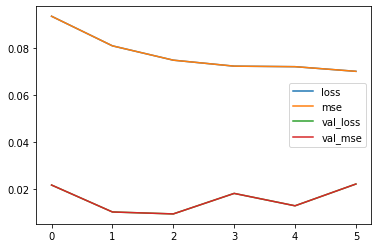

In [72]:
df_history = pd.DataFrame(history.history)
df_history.plot()

## 5.4. 테스트 세트를 이용한 모델 평가

In [73]:
loss, accuracy = model_LSTM.evaluate(x_test, y_test, verbose=1)
print(f'손실량: {loss:.2f}, 정확도: {accuracy:.2f}')

94/94 [==============================] - 0s 4ms/step - loss: 0.0224 - mse: 0.0224
손실량: 0.02, 정확도: 0.02


# **6. 최종 데이터 만들기**

## 6.1 TrainSet data

In [74]:
X = np.load(data_path + f'input_data{model_num}.npy')
Ypred = model_LSTM.predict(X)

3521/3521 [==============================] - 13s 4ms/step


In [75]:
talk_df = pd.read_csv(file_path + 'LSTM_dataframe.csv')
troll_df = talk_df.loc[talk_df['분류']!='비악플']

troll_df['예측'] = Ypred
troll_df[['문장','점수','예측']].to_csv(file_path + f'LSTM_dataframe_result{save_num}.csv')
troll_df[['문장','점수','예측']]

<ipython-input-75-f094d33bb9e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  troll_df['예측'] = Ypred


,문장,점수,예측
0,부랴부랴 왔는데 아무도 안왔네. 시간개념들이 없네,10,6.633821
1,맞아. 사람들이 진짜 개념이없다,10,6.334206
2,인방 보는 남자는 거르는게 맞다,5,6.828570
3,특히 벗방보는 애들은 진짜 거세 시켜야함,10,8.183313
4,댓글에 빠순이들 몰려와서 즈그 주인님 쉴드치는 꼴 좀 봐,10,6.653056
...,...,...,...
221892,와 10월에 모기 물렸네 모기들 모아놓고 불 싸지르고 싶네.,9,8.723973
221895,그것보다 어떻게 밥그릇 챙기면서 살 수 있을지 고민하는 게 훨씬 이득이지 않아?,8,7.024344
221896,저 나이 쳐먹고는 아이돌 하겠다고 나대는거임? 세상이 잘 돌아간다,8,6.772245
221897,저런 애들을 뽑아주기라도 하겠음? 그냥 실패의 맛 보러 나온거 아님? ㅋ,8,8.458209


## 6.2 UnSmile data

In [76]:
Ypred = model_LSTM.predict(padded_Xpred)

469/469 [==============================] - 2s 5ms/step


In [77]:
unsmile_df['예측'] = Ypred
unsmile_df[['문장','점수','예측']].to_csv(file_path + f'LSTM_dataframe2_result{save_num}.csv')
unsmile_df[['문장','점수','예측']]

,문장,점수,예측
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,7.425893,7.437487
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,8.312759,8.026755
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,9.050237,8.939939
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,7.748850,7.555670
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,7.363975,7.030290
...,...,...,...
14999,께롱께롱께롱!!!,6.525832,6.461671
15000,갱상도가아니라 홍어지 개좃같은 홍어년들,10.455935,10.311397
15001,말레이시아랑 인도네시아 여자 존나 못생겼던데,7.781963,7.736954
15002,링크도 안박고 가서 글 쓰자고 선동하네,7.572657,7.501607
